## Seed vs 3'UTR
A scatter plot with x-axis being the number of seeds in a given species and y-axis being the number of genes in that species. 

In [3]:
from numpy import loadtxt
import os
import pandas as pd 
from matplotlib import pyplot as plt

In [4]:
species_list = [
    ('Caenorhabditis elegans (PRJNA13758) genes (WBcel235)','Roundworm (Caenorhabditis elegans)'),
    ('Drosophila melanogaster (Fruit fly) genes (BDGP6.46)','Fruit fly (Drosophila melanogaster)'),
    ('Lamprey genes (Pmarinus_7.0)','Sea Lamprey (Petromyzon marinus)'),
    ('Hagfish genes (Eburgeri_3.2)','Inshore hagfish (Eptatretus burgeri)'),
    ('Elephant shark genes (Callorhinchus_milii-6.1.3)','Australian ghostshark (Callorhinchus milii)'),
    ('Spotted gar genes (LepOcu1)','Spotted gar (Lepisosteus oculatus)'),
    ('Zebrafish genes (GRCz11)','Zebrafish (Danio rerio)'),
    ('Atlantic cod genes (gadMor3.0)','Cod (Gadus morhua)'),
    ('Coelacanth genes (LatCha1)','Coelacanth (Latimeria chalumnae)'),
    ('Tropical clawed frog genes (Xenopus_tropicalis_v9.1)','Tropical clawed frog (Xenopus tropicalis)'),
    ('Tuatara genes (ASM311381v1)','Tuatara (Sphenodon punctatus)'),
    ('Green anole genes (AnoCar2.0v2)','Green anole lizard (Anolis carolinensis)'),
    ('Painted turtle genes (Chrysemys_picta_bellii-3.0.3)','Western painted turtle (Chrysemys picta bellii)'),
    ('Zebra finch genes (bTaeGut1_v1.p)','Zebra finch (Taeniopygia guttata)'),
    ('Chicken (maternal Broiler) genes (bGalGal1.mat.broiler.GRCg7b)','Chicken (Gallus gallus)'),
    ('Platypus genes (mOrnAna1.p.v1)','Platypus (Ornithorhynchus anatinus)'),
    ('Opossum genes (ASM229v1)','Gray short-tailed opossum (Monodelphis domestica)'),
    ('Armadillo genes (Dasnov3.0)','Nine-banded armadillo (Dasypus novemcinctus)'),
    ('Cow genes (ARS-UCD1.2)','Cow (Bos taurus)'),
    ('Dog genes (ROS_Cfam_1.0)','Dog (Canis familiaris)'),
    ('Rabbit genes (OryCun2.0)','Rabbit (Oryctolagus cuniculus)'),
    ('Guinea Pig genes (Cavpor3.0)','Guinea pig (Cavia porcellus)'),
    ('Rat genes (mRatBN7.2)','Norway rat (Rattus norvegicus)'),
    ('Mouse genes (GRCm39)','House mouse (Mus musculus)'),
    ('Human genes (GRCh38.p13)','Human (Homo sapiens)'),
    ('Human TargetScan','Human (Homo sapiens) TargetScan'),
    ('All','All')
]

In [6]:
def get_seed_number(mature_filename, canon_site):
    #returns real coverage and seed number from mature data
    df = pd.read_csv("Mature Data/"+mature_filename+'.csv')
    seed_data = df['Seed']
    
    #create reverse compliments
    seed_data = [sub.replace('A', 'X') for sub in seed_data]
    seed_data = [sub.replace('U', 'A') for sub in seed_data]
    seed_data = [sub.replace('X', 'T') for sub in seed_data]
    seed_data = [sub.replace('C', 'X') for sub in seed_data]
    seed_data = [sub.replace('G', 'C') for sub in seed_data]
    seed_data = [sub.replace('X', 'G') for sub in seed_data]
    seed_data = [sub[::-1] for sub in seed_data]
    
    #If canon site A or C, append A at the end
    if canon_site == 'A':
        seed_data = [item[:-1]+'A' for item in seed_data]
    elif canon_site == 'C':
        seed_data = [item+'A' for item in seed_data]
        
    #remove repeats
    seed_data = [*set(seed_data)]

    return len(seed_data)

In [19]:
def get_gene_number(genome_filename, canon_site):
    if genome_filename == 'All':
        genome_data = []
        for species in species_list:
            if species[0]!='All':
                temp_data = loadtxt("Genome Data/"+species[0]+".txt", comments=">",dtype="str")
                #remove all the Unavailable sequences and sequences that are too short
                allowed_char = 'AGCT'
                temp_data = list(filter(lambda a: all(ch in allowed_char for ch in a) and len(a)>7, temp_data))
                print(species[0]+": "+str(len(temp_data)))
                genome_data = genome_data+temp_data
    else:
         genome_data = loadtxt("Genome Data/"+genome_filename+".txt", comments=">",dtype="str")
            
    #remove all the Unavailable sequences and sequences that are too short
    allowed_char = 'AGCT'
    genome = list(filter(lambda a: all(ch in allowed_char for ch in a) and len(a)>7, genome_data))
    
    genome = [*set(genome)]
    
    return len(genome)

In [20]:
def calc_seed_v_3utr():
    sites = ['A','B','C']
    for site in sites:
        print("Loading site "+site)
        species_name = []
        seed_number = []
        gene_number = []
        canon = []
        for species in species_list:
            print("     Loading "+species[1])
            species_name.append(species[1]) 
            seed_number.append(get_seed_number(species[1],site))
            gene_number.append(get_gene_number(species[0],site))
            canon.append(site)
        df = pd.DataFrame({'Species':species_name, 'Seed Number': seed_number, 'Gene Number': gene_number, 'Canon Site':site})
        df.to_csv("Seed vs 3'UTR Data (site "+site+" ).csv")
        print("Done!")

In [21]:
calc_seed_v_3utr()

Loading site A
     Loading Roundworm (Caenorhabditis elegans)
     Loading Fruit fly (Drosophila melanogaster)
     Loading Sea Lamprey (Petromyzon marinus)
     Loading Inshore hagfish (Eptatretus burgeri)
     Loading Australian ghostshark (Callorhinchus milii)
     Loading Spotted gar (Lepisosteus oculatus)
     Loading Zebrafish (Danio rerio)
     Loading Cod (Gadus morhua)
     Loading Coelacanth (Latimeria chalumnae)
     Loading Tropical clawed frog (Xenopus tropicalis)
     Loading Tuatara (Sphenodon punctatus)
     Loading Green anole lizard (Anolis carolinensis)
     Loading Western painted turtle (Chrysemys picta bellii)
     Loading Zebra finch (Taeniopygia guttata)
     Loading Chicken (Gallus gallus)
     Loading Platypus (Ornithorhynchus anatinus)
     Loading Gray short-tailed opossum (Monodelphis domestica)
     Loading Nine-banded armadillo (Dasypus novemcinctus)
     Loading Cow (Bos taurus)
     Loading Dog (Canis familiaris)
     Loading Rabbit (Oryctolagus cunicu

In [1]:
def plot_seed_v_3utr(canon_site):
    #load df
    df = pd.read_csv("Seed vs 3'UTR Data (site "+canon_site+" ).csv")
    
    #font
    font = {'family' : 'Arial',
        'weight' : 'normal',
        'size'   : 18}
    plt.rc('font', **font)
    plt.rcParams['svg.fonttype'] = 'none'
    
    #drop target scan and all
    df = df.drop(df[df['Species']=='All'].index)
    df = df.drop(df[df['Species']=='Human (Homo sapiens) TargetScan'].index)
    
    #figure
    fig,ax = plt.subplots(figsize=(15,10))
    fig.patch.set_facecolor('white')
    plt.title("Seed Vs 3'UTR Plot Canon Site "+canon_site)
    plt.xlabel("Seed")
    plt.ylabel("3'UTR")
    
    #scatter plot
    plt.scatter(x=df['Seed Number'], y=df['Gene Number'])
    
    #label points 
    plt.rcParams.update({'font.size': 10})
    for species in df['Species']:
        index = df[df['Species']==species].index
        plt.text(df['Seed Number'][index]+1, df['Gene Number'][index]+1, species)
        
    #save fig
    plt.savefig("Seed Vs 3'UTR Plot (site "+canon_site+").svg", dpi = 120, facecolor=fig.get_facecolor())

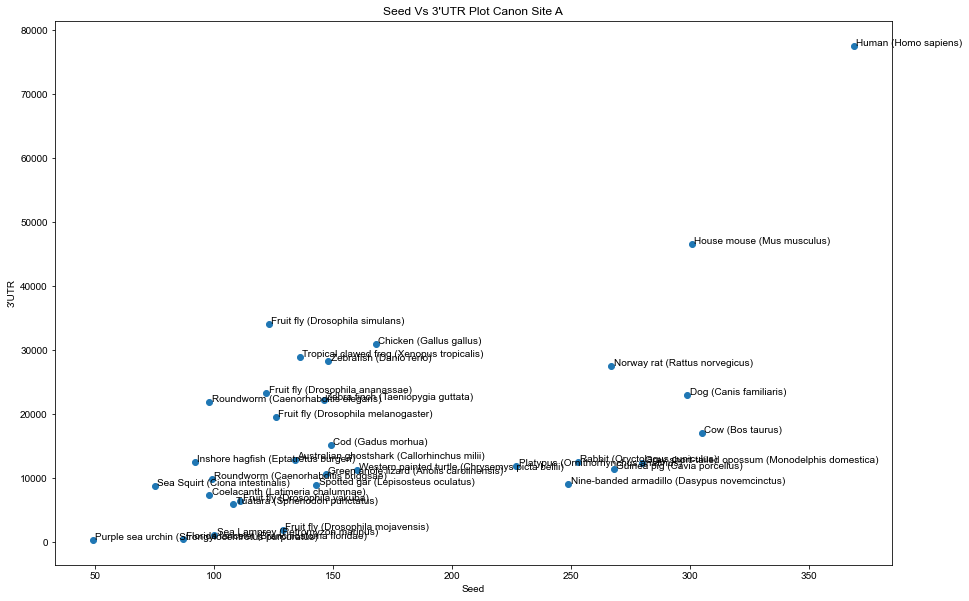

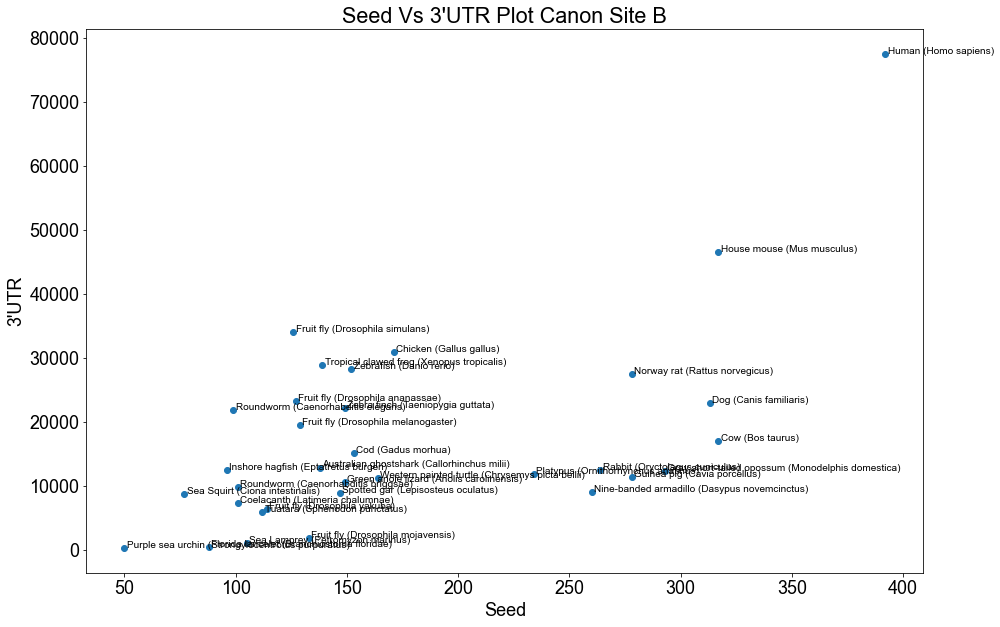

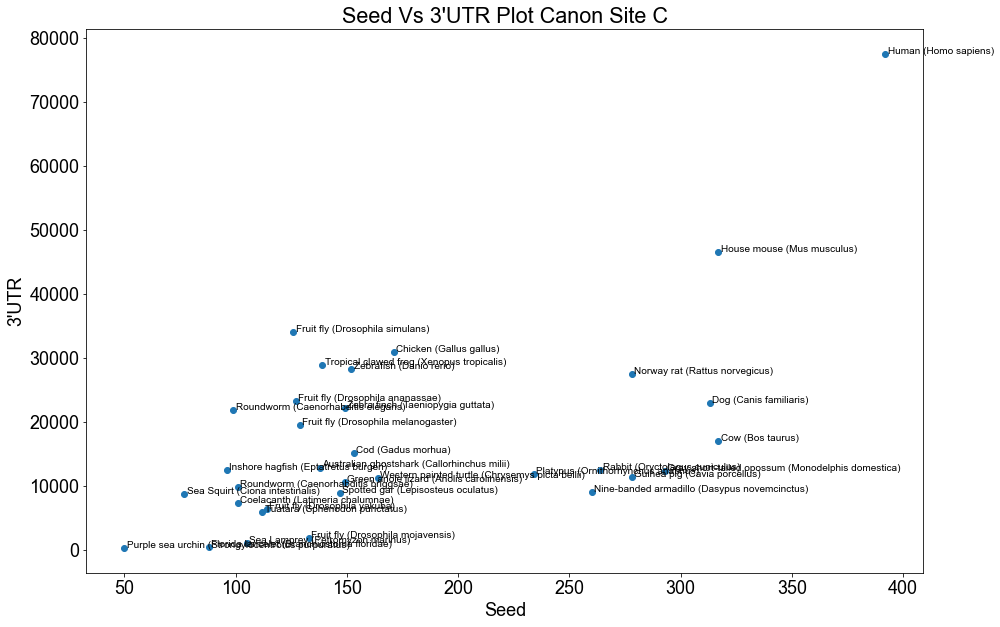

In [4]:
sites = ['A','B','C']
for site in sites:
    plot_seed_v_3utr(site)